# 데이터사이언스 (0010085001)

## Exercise 11: Linear Classification

In this excercise, we will implement the pocket algorithm for the binary classification.

In [1]:
import numpy as np

%matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib

In [8]:
# 1. 데이터 생성
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

np.random.seed(0) # numpy의 random을 활용할 때, random을 활용하지만 동일한 dataset을 만들기 위해

X, y = sklearn.datasets.make_moons(200, noise=0.01)
# X, y = sklearn.datasets.make_moons(200, noise=0.001) # noise가 작으면 feature가 잘 따닥따닥 붙어서 나옴
# X, y = sklearn.datasets.make_moons(200, noise=1) # feature들이 많이 떨어져있음

# 데이터 크기 및 샘플 확인
print(X[:5])  
print(y[:5])
print(X.shape, y.shape) # (f1, f2)

[[ 0.83636391  0.53684159]
 [ 1.60820703 -0.31257533]
 [ 0.01540227  0.27849723]
 [-1.00395932  0.01029438]
 [ 1.76614482 -0.14836984]]
[0 1 1 0 1]
(200, 2) (200,)


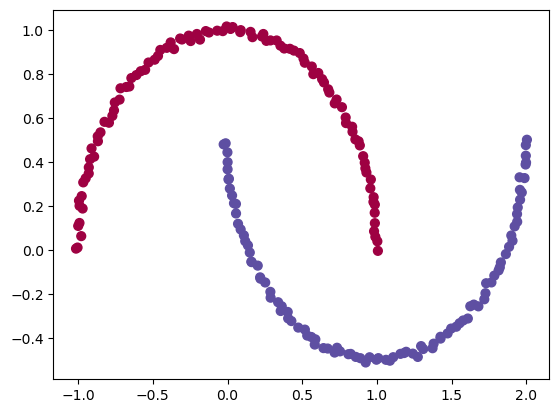

In [9]:
# 2. 데이터 시각화
plt.scatter(
    X[:, 0], X[:, 1], # 모든 data들의 feature 1, feature 2를 그려보자
    s=40, # size
    c=y,  # color를 다르게 보여줘라
    cmap=plt.cm.Spectral
)

In [12]:
# 3. bias 설정

# X 의 모든 데이터에 bias 로 활용될, x_0 = 1 을 추가
oneVector = np.ones((X.shape[0], 1))
print(oneVector.shape)

# 기존에 x_1, x_2만 존재하는 X 에 x_0 을 붙임
X_train = np.concatenate((oneVector, X), axis=1)
print(X_train.shape)
print(X_train[:5])

(200, 1)
(200, 3)
[[ 1.          0.83636391  0.53684159]
 [ 1.          1.60820703 -0.31257533]
 [ 1.          0.01540227  0.27849723]
 [ 1.         -1.00395932  0.01029438]
 [ 1.          1.76614482 -0.14836984]]


In [13]:
# 4. 파라미터 설정


# w(t+1) = w(t) + (learning_rate) * (y(t) * x(t)  -> weight를 얼마만큼 update할 것인지 
# 학습률 (learning rate) 설정
# -> 각 iteration 에서 가중치의 갱신 정도를 결정
learningRate = 0.01

# 파라미터 (parameter) 또는 가중치 (weights) 설정 (랜덤하게 초기화)
# -> [w_0, w_1, w_2] 을 의미
weights = np.random.rand(3, 1)

# 최대 오분류 샘플 수 설정
# -> pocket algorithm 에서는 모든 데이터에 대해 평가 (evaluation) 수행
# -> 얼마나 좋은 가중치 (weights) 인지 확인
minMisclassifications = 10000

# 반복 (iteration) 횟수 초기화
numIteration = 1000

In [17]:
# 5. pocket 알고리즘 학습

# 최적의 가중치를 저장할 변수 설정
best_weights = np.zeros((3, 1))

for iteration in range(numIteration):
    iteration += 1
    
    misClassifications = 0 # 몇 개 틀렸는지. 틀린 data가 나올 때마다 +1

    for i in range(0, len(X_train)): # 0 ~ 199까지 iteration을 돈다.
        # 전체 데이터에서 하나씩 읽어옴
        currentX = X_train[i].reshape(-1, X_train.shape[1]) # (3,) -> (1, 3) : 차원을 하나 늘려줌... {w^Tx -> (1, 3) * (3, 1) -> scalar를 위해서} 
        currentY = y[i]

        # y_true (f) = [1, 0, 1, 0, 0, 1, 0, 0, ...] (200개)
        # y_pred (h) = [1, 1, 0, 1, 1, 0, 1, 1, ...] (200개)
        
        # e.g. 1st data
        #  currentY == 1 and wTx > 0 :   => 올바르게 분류
        
        # 2nd data
        # currentY == 0 and wTx > 0      => 오분류 elif문
        
        # 3rd data
        # currentY == 1 and wTx < 0      => 오분류 if문
        
        # 4th data
        # currentY = 0 and wTx < 0       => 올바르게 분류
        

         # 각 데이터에 대해 w^T x 연산 수행
        wTx = np.dot(currentX, weights)[0][0]
        
        # PLA 알고리즘과 동일
        # -> 오분류의 기준이 퍼셉트론 (perceptron) 과 동일
        # -> 차이가 있다면 가중치 (learning rate) 가 입력에 곱해지는 것
        if currentY == 1 and wTx < 0 : # 진짜 y는 1인데 예측은 음수. --> 오분류
            misClassifications += 1
            # w(t+1) = w(t) + learning_rate * y(t) * x(t)
            weights += learningRate * np.transpose(currentX)

        elif currentY == 0 and wTx > 0 : # 진짜 y는 0인데 예측은 양수. --> 오분류 (교재에서는 -1)
            misClassifications += 1
            weights -= learningRate * np.transpose(currentX)
    
    # 최적의 가중치 확인 및 저장
    if misClassifications < minMisclassifications:
        minMisclassifications = misClassifications
        
        print('Keep best weights: {}'.format(minMisclassifications))
        best_weights = weights
    
    if iteration % 100 == 0:
        print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))

Keep best weights: 104
Keep best weights: 43
Keep best weights: 36
Keep best weights: 33
Iteration 100, Misclassifications 38
Iteration 200, Misclassifications 38
Iteration 300, Misclassifications 35
Keep best weights: 32
Iteration 400, Misclassifications 34
Iteration 500, Misclassifications 35
Iteration 600, Misclassifications 35
Iteration 700, Misclassifications 38
Iteration 800, Misclassifications 35
Iteration 900, Misclassifications 40
Iteration 1000, Misclassifications 39


In [18]:
# 6. 학습 결과 확인

# 우리는 이전 셀 학습에서 minMisclassifications 에 가장 적게 틀린
print("Minimum Misclassifications : {}".format(minMisclassifications) )

print('Final weight is: {}'.format(weights.transpose()) )

print('Best weight is: {}'.format(best_weights.transpose()) )

# accuracy: (전체 데이터 수 - 틀린 데이터 수) / 전체 데이터 수
accuracy = ((X_train.shape[0] - minMisclassifications) / X_train.shape[0])

print("Best Accuracy of PocketAlgorithm is: {}".format(accuracy))

Minimum Misclassifications : 32
Final weight is: [[ 0.01499445  0.01845975 -0.03298617]]
Best weight is: [[ 0.01499445  0.01845975 -0.03298617]]
Best Accuracy of PocketAlgorithm is: 0.84


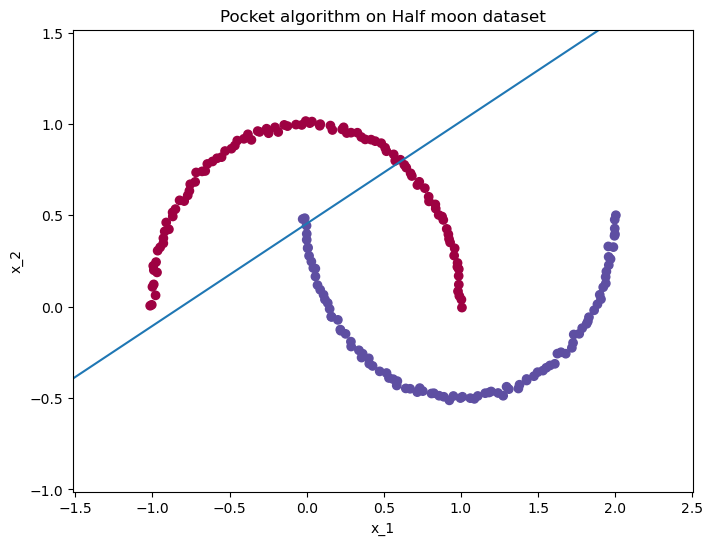

In [19]:
# 7. 학습 결과 시각화

# 그려질 그래프의 두 축의 최대, 최소값 설정
max_x = np.max(X[:, 0])
min_x = np.min(X[:, 0])

max_y = np.max(X[:, 1])
min_y = np.min(X[:, 1])

def plot_hyperplane(X, Y, weights):
    
    # line 의 기울기 및 절편 계산
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]

    # line 생성
    x_hyperplane = np.linspace(-2, 3, 10)
    y_hyperplane = slope * x_hyperplane + intercept
    
    # 그래프 그리기
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)

    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Pocket algorithm on Half moon dataset")
    plt.xlabel("x_1")
    plt.ylabel("x_2")

    plt.xlim((min_x - 0.5, max_x + 0.5))
    plt.ylim((min_y - 0.5, max_y + 0.5))
    
    plt.show()

# Final weights 로 line 그리기    
# plot_hyperplane(X, y, weights)

# Best weights 로 line 그리기
plot_hyperplane(X, y, best_weights)